In [72]:
def grid_dicto_to_df_list(grid_list):
    list_to_df = []
    non_metrics = ['proba_outputs', 'actual_classes', 'proba_outputs', 'actual_classes', 'test_proba', 'test_actual_classes']
    for dict_hyper in grid_list:
        dict_to_df = {}
        # print(dict_hyper)
        for val in dict_hyper.values():
            for item in val.items():
                if type(item[1]) != dict:
                    dict_to_df[item[0]] = item[1]
                else:
                    dictionary_results = item[1]
                    for item in dictionary_results.items(): 
                        if item[0] not in non_metrics:
                            dict_to_df[item[0]] = item[1]
        list_to_df.append(dict_to_df)
        return list_to_df

# Initial grid analysis of INDIVIDUAL DETERMINANT models

In [ ]:
import pandas as pd 
import json

In [ ]:
with open("grid_results_determinants_individual_til 14.json") as f:
    grids = json.load(f)
with open("grid_results_determinants_individual_next_6.json") as f:
    grids_2 = json.load(f)
    
determinant_ind = grids + grids_2

In [73]:
list_to_df = grid_dicto_to_df_list(determinant_ind)

In [62]:
df = pd.DataFrame(list_to_df)

In [49]:
df.columns

Index(['max-len', 'learning_rate', 'batch_size', 'num_train_epochs',
       'n_epochs', 'train_loss_epoch_16', 'valid_loss_epoch_16', 'f1_epoch_16',
       'accuracy_epoch_16', 'roc_auc_epoch_16', 'hamming_epoch_16',
       'proba_outputs_epoch_16', 'actual_classes_epoch_16', 'epoch',
       'train_loss', 'valid_loss', 'val_acc', 'val_f1', 'val_roc_auc',
       'val_hamming', 'test_loss', 'test_f1', 'test_roc_auc', 'test_hamming',
       'test_accuracy', 'test_proba', 'test_actual_classes'],
      dtype='object')

In [64]:
df.head()

,max-len,learning_rate,batch_size,num_train_epochs,n_epochs,train_loss_epoch_16,valid_loss_epoch_16,f1_epoch_16,accuracy_epoch_16,roc_auc_epoch_16,...,valid_loss,val_acc,val_f1,val_roc_auc,val_hamming,test_loss,test_f1,test_roc_auc,test_hamming,test_accuracy
0,128,0.00001,8,16,17,0.004370,0.039469,0.305085,0.250000,0.600542,...,0.039469,0.250000,0.305085,0.600542,0.063272,0.068948,0.333333,0.620049,0.066667,0.30
1,128,0.00001,12,16,17,0.007297,0.065836,0.387097,0.333333,0.636256,...,0.065806,0.277778,0.338983,0.613272,0.060185,0.099257,0.368421,0.640304,0.066667,0.35
2,128,0.00001,16,16,17,0.010159,0.076458,0.170213,0.111111,0.546794,...,0.076458,0.111111,0.170213,0.546794,0.060185,0.117579,0.294118,0.599794,0.066667,0.25
3,128,0.00001,32,16,17,0.022884,0.134825,0.000000,0.000000,0.500000,...,0.134825,0.000000,0.000000,0.500000,0.064815,0.230287,0.358974,0.638821,0.069444,0.35
4,128,0.00001,64,16,17,0.053796,0.290275,0.000000,0.000000,0.500000,...,0.290275,0.000000,0.000000,0.500000,0.064815,0.287742,0.333333,0.634370,0.077778,0.35


## Evaluating hyperparameters

In [60]:
df.pivot_table(["train_loss_epoch_16", "valid_loss_epoch_16"], index = "learning_rate", columns="batch_size")

train_loss_epoch_16                                          \
batch_size                     8         12        16        32        64   
learning_rate                                                               
0.00001                  0.004370  0.007297  0.010159  0.022884  0.053796   
0.00002                  0.003063  0.005032  0.007606  0.018162  0.040963   
0.00003                  0.001805  0.003731  0.006056  0.018494  0.038279   
0.00005                  0.001189  0.002345  0.004743  0.013665  0.033693   

              valid_loss_epoch_16                                          
batch_size                     8         12        16        32        64  
learning_rate                                                              
0.00001                  0.039469  0.065836  0.076458  0.134825  0.290275  
0.00002                  0.038549  0.058106  0.074459  0.122437  0.230281  
0.00003                  0.037025  0.051506  0.071105  0.117712  0.210895  
0.00005                  0.039446  0.059691  0.070916  0.130530  0.194061

Higher batch sizes still experience heavy train and validation loss which means that even with 16 epochs, they still have a lot of room for further training. Generally, what we can take away from this is that we should favor either 1. pairing lower batch sizes with less epochs and low-medium learning rates or 2. pairing higher batch sizes with higher learning rates and more epochs. 

With our training data, option 1 seems more appropiate.

<!-- We can see that generally the lower the batch size the faster a model will learn and the better a model will perform.

We can scratch bath size 64 since we would need a higher learning rate and we may lose control of the pace of learning.  -->

In [70]:
df.pivot_table(["train_loss_epoch_16", "valid_loss_epoch_16", "val_hamming"], index = "learning_rate", columns="batch_size")

#  Hamming loss is the fraction of labels that are incorrectly predicted

train_loss_epoch_16                                          \
batch_size                     8         12        16        32        64   
learning_rate                                                               
0.00001                  0.004370  0.007297  0.010159  0.022884  0.053796   
0.00002                  0.003063  0.005032  0.007606  0.018162  0.040963   
0.00003                  0.001805  0.003731  0.006056  0.018494  0.038279   
0.00005                  0.001189  0.002345  0.004743  0.013665  0.033693   

              val_hamming                                          \
batch_size             8         12        16        32        64   
learning_rate                                                       
0.00001          0.063272  0.060185  0.060185  0.064815  0.064815   
0.00002          0.054012  0.055556  0.057099  0.055556  0.064815   
0.00003          0.052469  0.043210  0.057099  0.060185  0.064815   
0.00005          0.049383  0.051698  0.048611  0.057870  0.061728   

              valid_loss_epoch_16                                          
batch_size                     8         12        16        32        64  
learning_rate                                                              
0.00001                  0.039469  0.065836  0.076458  0.134825  0.290275  
0.00002                  0.038549  0.058106  0.074459  0.122437  0.230281  
0.00003                  0.037025  0.051506  0.071105  0.117712  0.210895  
0.00005                  0.039446  0.059691  0.070916  0.130530  0.194061

For the next search we'll discard Batch sizes 32, 64 and learning rate 3-e5.

# Initial grid analysis of INDIVIDUAL CONTENT models

In [83]:
with open("grid_results_contents_individual_21.json") as f:
    grids = json.load(f)

In [84]:
list_to_df = grid_dicto_to_df_list(grids)

In [85]:
df = pd.DataFrame(list_to_df)

In [86]:
df.columns

Index(['max-len', 'learning_rate', 'batch_size', 'num_train_epochs',
       'n_epochs', 'train_loss_epoch_16', 'valid_loss_epoch_16', 'f1_epoch_16',
       'accuracy_epoch_16', 'roc_auc_epoch_16', 'hamming_epoch_16',
       'proba_outputs_epoch_16', 'actual_classes_epoch_16', 'epoch',
       'train_loss', 'valid_loss', 'val_acc', 'val_f1', 'val_roc_auc',
       'val_hamming', 'test_loss', 'test_f1', 'test_roc_auc', 'test_hamming',
       'test_accuracy'],
      dtype='object')

In [87]:
df

,max-len,learning_rate,batch_size,num_train_epochs,n_epochs,train_loss_epoch_16,valid_loss_epoch_16,f1_epoch_16,accuracy_epoch_16,roc_auc_epoch_16,...,valid_loss,val_acc,val_f1,val_roc_auc,val_hamming,test_loss,test_f1,test_roc_auc,test_hamming,test_accuracy
0,128,0.00001,8,16,17,0.004309,0.02627,0.041667,0.02439,0.510638,...,0.02627,0.02439,0.041667,0.510638,0.041554,0.047241,0.387097,0.624162,0.030596,0.217391


## Evaluating hyperparameters


In [78]:
df.pivot_table(["train_loss_epoch_16", "valid_loss_epoch_16"], index = "learning_rate", columns="batch_size")

,train_loss_epoch_16,valid_loss_epoch_16
batch_size,8,8
learning_rate,,
0.00001,0.00437,0.039469


In [79]:
df.pivot_table(["train_loss_epoch_16", "valid_loss_epoch_16", "val_hamming"], index = "learning_rate", columns="batch_size")


,train_loss_epoch_16,val_hamming,valid_loss_epoch_16
batch_size,8,8,8
learning_rate,,,
0.00001,0.00437,0.063272,0.039469


In [80]:
df.pivot_table(["train_loss_epoch_16", "valid_loss_epoch_16", "val_hamming"], index = "learning_rate", columns="batch_size")

#  Hamming loss is the fraction of labels that are incorrectly predicted

,train_loss_epoch_16,val_hamming,valid_loss_epoch_16
batch_size,8,8,8
learning_rate,,,
0.00001,0.00437,0.063272,0.039469


# Initial grid analysis of MACRO DETERMINANT models

In [ ]:
with open("") as f:
    grids = json.load(f)
    
list_to_df = grid_dicto_to_df_list(grids)

In [ ]:
df = pd.DataFrame(list_to_df)

In [ ]:
df.columns

In [ ]:
df.head()

## Evaluating hyperparameters


In [ ]:
df.pivot_table(["train_loss_epoch_16", "valid_loss_epoch_16"], index = "learning_rate", columns="batch_size")

In [ ]:
df.pivot_table(["train_loss_epoch_16", "valid_loss_epoch_16", "val_hamming"], index = "learning_rate", columns="batch_size")


In [ ]:
df.pivot_table(["train_loss_epoch_16", "valid_loss_epoch_16", "val_hamming"], index = "learning_rate", columns="batch_size")

#  Hamming loss is the fraction of labels that are incorrectly predicted

# Initial grid analysis of MACRO CONTENT models

In [88]:
with open("grid_results_contents_macro_first _20.json") as f:
    grids = json.load(f)
    
list_to_df = grid_dicto_to_df_list(grids)

In [89]:
df = pd.DataFrame(list_to_df)

In [90]:
df.columns

Index(['max-len', 'learning_rate', 'batch_size', 'num_train_epochs',
       'n_epochs', 'train_loss_epoch_16', 'valid_loss_epoch_16', 'f1_epoch_16',
       'accuracy_epoch_16', 'roc_auc_epoch_16', 'hamming_epoch_16',
       'proba_outputs_epoch_16', 'actual_classes_epoch_16', 'epoch',
       'train_loss', 'valid_loss', 'val_acc', 'val_f1', 'val_roc_auc',
       'val_hamming', 'test_loss', 'test_f1', 'test_roc_auc', 'test_hamming',
       'test_accuracy'],
      dtype='object')

In [91]:
df.head()

,max-len,learning_rate,batch_size,num_train_epochs,n_epochs,train_loss_epoch_16,valid_loss_epoch_16,f1_epoch_16,accuracy_epoch_16,roc_auc_epoch_16,...,valid_loss,val_acc,val_f1,val_roc_auc,val_hamming,test_loss,test_f1,test_roc_auc,test_hamming,test_accuracy
0,128,0.00001,8,16,17,0.003065,0.036053,0.693333,0.583333,0.793827,...,0.034813,0.611111,0.75,0.811121,0.045455,0.06528,0.638298,0.804452,0.073593,0.47619


## Evaluating hyperparameters

In [92]:
df.pivot_table(["train_loss_epoch_16", "valid_loss_epoch_16"], index = "learning_rate", columns="batch_size")

,train_loss_epoch_16,valid_loss_epoch_16
batch_size,8,8
learning_rate,,
0.00001,0.003065,0.036053


In [93]:
df.pivot_table(["train_loss_epoch_16", "valid_loss_epoch_16", "val_hamming"], index = "learning_rate", columns="batch_size")


,train_loss_epoch_16,val_hamming,valid_loss_epoch_16
batch_size,8,8,8
learning_rate,,,
0.00001,0.003065,0.045455,0.036053


In [94]:
df.pivot_table(["train_loss_epoch_16", "valid_loss_epoch_16", "val_hamming"], index = "learning_rate", columns="batch_size")

#  Hamming loss is the fraction of labels that are incorrectly predicted

,train_loss_epoch_16,val_hamming,valid_loss_epoch_16
batch_size,8,8,8
learning_rate,,,
0.00001,0.003065,0.045455,0.036053


# OLD, KEEPING IN CASE WE NEED IT

In [48]:
lr_curves = df.pivot_table(["train_loss", "valid_loss"], ["max-len", "learning_rate", "batch_size"], "epoch")

In [51]:
lr_curves

train_loss                                \
epoch                                     2         3         4         5   
max-len learning_rate batch_size                                            
128     0.00001       8            0.012638  0.011768  0.010949  0.010417   
                      12           0.020057  0.017504  0.017515  0.015501   
                      16           0.025657  0.023657  0.022892  0.022266   
                      32           0.053695  0.054449  0.047526  0.047373   
                      64           0.099104  0.105277  0.101223  0.092360   
        0.00002       8            0.011990  0.010563  0.008473  0.006725   
                      12           0.018029  0.016505  0.014949  0.013255   
                      16           0.024818  0.022304  0.020176  0.017698   
                      32           0.049834  0.042867  0.042146  0.042327   
                      64           0.095870  0.089329  0.090291  0.082607   
        0.00003       8            0.011618  0.010534  0.007464  0.005482   
                      12           0.017646  0.015113  0.011198  0.012793   
                      16           0.023556  0.021533  0.019535  0.016608   
                      32           0.049930  0.044721  0.042368  0.038564   
                      64           0.089085  0.088718  0.082669  0.077385   
        0.00005       8            0.011516  0.008733  0.006491  0.003343   
                      12           0.017911  0.014130  0.010601  0.007587   
                      16           0.023007  0.019785  0.016626  0.011667   
                      32           0.044896  0.044208  0.039355  0.035936   
                      64           0.088710  0.083263  0.083880  0.076100   
256     0.00001       8            0.012603  0.012083  0.011304  0.009995   
                      12           0.019146  0.018039       NaN  0.016398   
                      16           0.025319  0.024424  0.023445  0.021397   
                      32           0.052134  0.050509  0.047473  0.045960   

                                                     valid_loss            \
epoch                                    6         8          2         3   
max-len learning_rate batch_size                                            
128     0.00001       8           0.009283  0.008330   0.098924  0.089157   
                      12          0.016061  0.012065   0.169590  0.154068   
                      16          0.020241  0.017232   0.164174  0.141677   
                      32          0.043336  0.040969   0.270948  0.270621   
                      64          0.091098  0.081616   0.568799  0.615193   
        0.00002       8           0.005857  0.003166   0.091733  0.070550   
                      12          0.011438  0.009204   0.163473  0.138360   
                      16          0.017338  0.010999   0.159943  0.143074   
                      32          0.039137  0.037677   0.249196  0.211701   
                      64          0.087608  0.074426   0.560602  0.506711   
        0.00003       8           0.003388  0.003359   0.080787  0.072114   
                      12          0.006915  0.003592   0.145217  0.124398   
                      16          0.011875  0.008291   0.145839  0.125150   
                      32          0.036902  0.024415   0.237986  0.217762   
                      64          0.078268  0.066029   0.505345  0.533466   
        0.00005       8           0.003965  0.001233   0.078146  0.050036   
                      12          0.006100  0.004289   0.160217  0.092388   
                      16          0.009198  0.004641   0.144500  0.102482   
                      32          0.029716  0.015490   0.215258  0.206653   
                      64          0.079581  0.062490   0.500774  0.466241   
256     0.00001       8           0.008976  0.007854   0.089675  0.091561   
                      12          0.014426  0.011743   0.166370  0.157249   
                      16    

In [53]:
lr_curves.iloc[0]["train_loss"]

epoch
2    0.012638
3    0.011768
4    0.010949
5    0.010417
6    0.009283
8    0.008330
Name: (128, 1e-05, 8), dtype: float64

In [54]:
lr_curves.iloc[0]["valid_loss"]

epoch
2    0.098924
3    0.089157
4    0.084407
5    0.074574
6    0.068447
8    0.055640
Name: (128, 1e-05, 8), dtype: float64

train_loss epoch
2    0.012638
3    0.011768
4    0.010949
5    0.010417
6    0.009283
8    0.008330
Name: (128, 1e-05, 8), dtype: float64
valid_loss epoch
2    0.098924
3    0.089157
4    0.084407
5    0.074574
6    0.068447
8    0.055640
Name: (128, 1e-05, 8), dtype: float64
(128, 1e-05, 8)


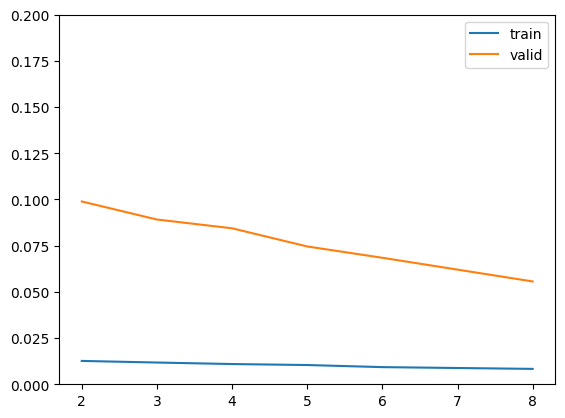

train_loss epoch
2    0.011990
3    0.010563
4    0.008473
5    0.006725
6    0.005857
8    0.003166
Name: (128, 2e-05, 8), dtype: float64
valid_loss epoch
2    0.091733
3    0.070550
4    0.058690
5    0.045623
6    0.032718
8    0.020428
Name: (128, 2e-05, 8), dtype: float64
(128, 2e-05, 8)


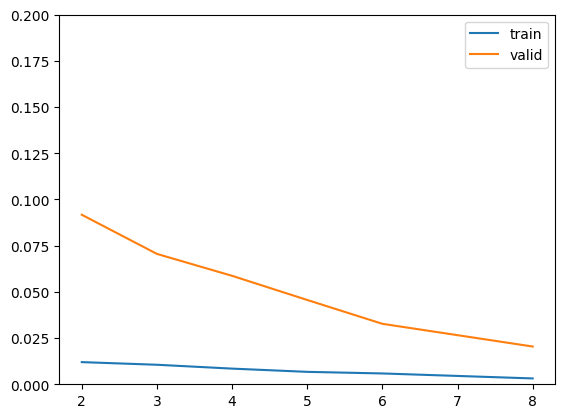

train_loss epoch
2    0.011618
3    0.010534
4    0.007464
5    0.005482
6    0.003388
8    0.003359
Name: (128, 3e-05, 8), dtype: float64
valid_loss epoch
2    0.080787
3    0.072114
4    0.045522
5    0.031081
6    0.020360
8    0.019141
Name: (128, 3e-05, 8), dtype: float64
(128, 3e-05, 8)


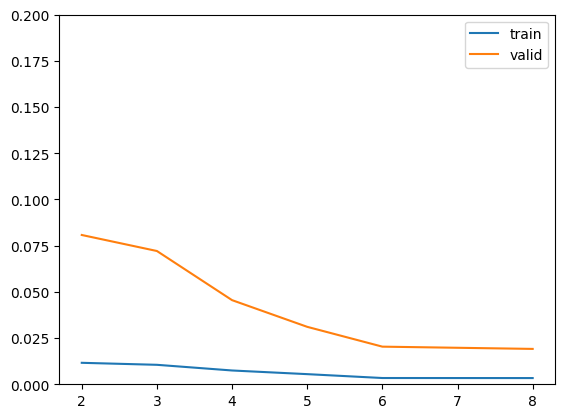

train_loss epoch
2    0.011516
3    0.008733
4    0.006491
5    0.003343
6    0.003965
8    0.001233
Name: (128, 5e-05, 8), dtype: float64
valid_loss epoch
2    0.078146
3    0.050036
4    0.034898
5    0.017779
6    0.019499
8    0.011852
Name: (128, 5e-05, 8), dtype: float64
(128, 5e-05, 8)


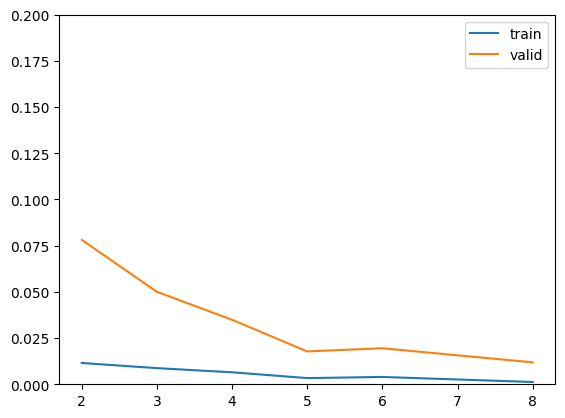

train_loss epoch
2    0.012603
3    0.012083
4    0.011304
5    0.009995
6    0.008976
8    0.007854
Name: (256, 1e-05, 8), dtype: float64
valid_loss epoch
2    0.089675
3    0.091561
4    0.085354
5    0.074044
6    0.061997
8    0.048786
Name: (256, 1e-05, 8), dtype: float64
(256, 1e-05, 8)


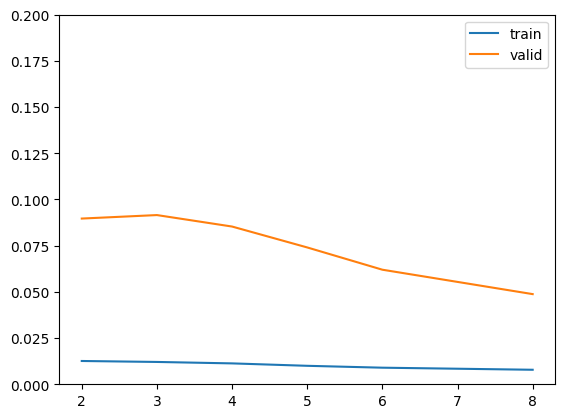

In [97]:
candidates = []

for row, col in lr_curves.iterrows():

    train_loss_array = col["train_loss"]
    valid_loss_array = col["valid_loss"]
    if valid_loss_array[2] < 0.1:
        candidates.append(row)
        print("train_loss", train_loss_array)
        print("valid_loss", valid_loss_array)
        print(row)
        epochs = [2, 3, 4, 5, 6, 8]
        fig, ax = plt.subplots()
        ax.set_ylim(0,0.2)
        plt.plot(epochs, train_loss_array, label="train")
        plt.legend()
        plt.plot(epochs, valid_loss_array, label="valid")
        plt.legend()
        plt.show()
        # train_loss_array = df.iloc[]["train_loss"]
    

In [98]:
candidates

[(128, 1e-05, 8),
 (128, 2e-05, 8),
 (128, 3e-05, 8),
 (128, 5e-05, 8),
 (256, 1e-05, 8)]

In [100]:
df[(df["batch_size"] == 8) & (df["max-len"] == 128) & (df["epoch"] == 8) ]

,max-len,learning_rate,batch_size,num_train_epochs,epoch,train_loss,valid_loss,val_acc,val_f1,val_roc_auc,val_hamming,test_f1,test_roc_auc,test_hamming,test_accuracy
5,128,0.00001,8,8,8,0.008330,0.055640,0.555556,0.776471,0.832267,0.105556,0.654545,0.766444,0.200000,0.421053
35,128,0.00002,8,8,8,0.003166,0.020428,0.944444,0.967033,0.968085,0.016667,0.625000,0.737737,0.189474,0.526316
65,128,0.00003,8,8,8,0.003359,0.019141,0.888889,0.933333,0.943049,0.033333,0.625000,0.737737,0.189474,0.473684
95,128,0.00005,8,8,8,0.001233,0.011852,0.972222,0.978261,0.978723,0.011111,0.653061,0.756968,0.178947,0.526316


In [105]:
df.sort_values("test_hamming", ascending=True)

,max-len,learning_rate,batch_size,num_train_epochs,epoch,train_loss,valid_loss,val_acc,val_f1,val_roc_auc,val_hamming,test_f1,test_roc_auc,test_hamming,test_accuracy
64,128,0.00003,8,6,6,0.003388,0.020360,0.916667,0.955556,0.957447,0.022222,0.705882,0.795429,0.157895,0.578947
70,128,0.00003,12,6,6,0.006915,0.044345,0.861111,0.945055,0.953687,0.027778,0.666667,0.768952,0.178947,0.578947
62,128,0.00003,8,4,4,0.007464,0.045522,0.694444,0.847059,0.875460,0.072222,0.638298,0.744983,0.178947,0.526316
61,128,0.00003,8,3,3,0.010534,0.072114,0.527778,0.735632,0.810350,0.127778,0.653061,0.756968,0.178947,0.526316
93,128,0.00005,8,5,5,0.003343,0.017779,0.944444,0.967033,0.968085,0.016667,0.638298,0.744983,0.178947,0.526316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,256,0.00001,32,3,3,0.050509,0.251619,0.111111,0.226415,0.563830,0.227778,0.475000,0.611761,0.442105,0.000000
96,128,0.00005,12,2,2,0.017911,0.160217,0.138889,0.521739,0.676372,0.244444,0.459770,0.587514,0.494737,0.052632
25,128,0.00001,64,3,3,0.105277,0.615193,0.055556,0.076923,0.509998,0.266667,0.385542,0.510591,0.536842,0.000000
24,128,0.00001,64,2,2,0.099104,0.568799,0.361111,0.473684,0.650136,0.222222,0.451613,0.570513,0.536842,0.000000


In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

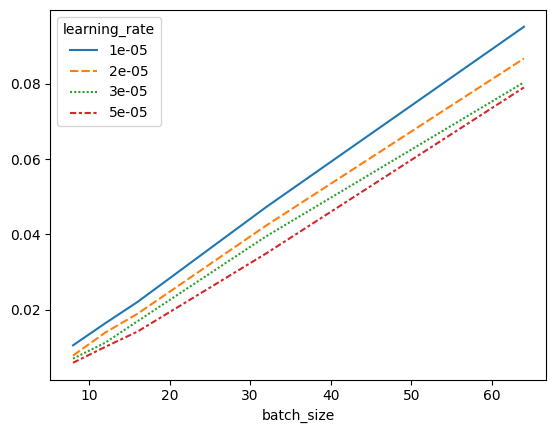

In [23]:
# df.pivot_table("train_loss", index="batch_size", columns="epoch")
sns.lineplot(df.pivot_table("train_loss", index="batch_size", columns="learning_rate"))
plt.show()

In [28]:
df.pivot_table("val_f1", index="batch_size", columns="learning_rate")


learning_rate,0.00001,0.00002,0.00003,0.00005
batch_size,,,,
8,0.520028,0.738285,0.826715,0.869408
12,0.427065,0.642209,0.743243,0.857169
16,0.426024,0.587445,0.759086,0.798104
32,0.233890,0.488532,0.478817,0.673709
64,0.213279,0.102280,0.283535,0.332741


In [34]:
df.pivot_table("train_loss", index="num_train_epochs", columns="batch_size")

batch_size,8,12,16,32,64
num_train_epochs,,,,,
2,0.397769,0.275991,0.179460,0.116576,0.128838
3,0.562559,0.474716,0.467968,0.417302,0.078054
4,0.648343,0.577810,0.592837,0.345786,0.245330
5,0.806255,0.681425,0.727027,0.416070,0.259265
6,0.839503,0.802935,0.776245,0.535925,0.180425
8,0.914928,0.903223,0.852483,0.698947,0.505840


The larger the batch size, the more epochs we need

In [38]:
df.pivot_table("val_loss", index="num_train_epochs", columns="learning_rate")

learning_rate,0.00001,0.00002,0.00003,0.00005
num_train_epochs,,,,
2,0.444884,0.431269,0.494920,0.402652
3,0.452277,0.549296,0.494995,0.554287
4,0.437840,0.561055,0.549247,0.544104
5,0.502723,0.529620,0.537557,0.613458
6,0.490882,0.557319,0.578167,0.610236
8,0.562151,0.570526,0.598490,0.583137


The larger the learning_rate, the less epochs we need

In [36]:
df.pivot_table("test_f1", index="num_train_epochs", columns="learning_rate")

learning_rate,0.00001,0.00002,0.00003,0.00005
num_train_epochs,,,,
2,0.444884,0.431269,0.494920,0.402652
3,0.452277,0.549296,0.494995,0.554287
4,0.437840,0.561055,0.549247,0.544104
5,0.502723,0.529620,0.537557,0.613458
6,0.490882,0.557319,0.578167,0.610236
8,0.562151,0.570526,0.598490,0.583137


In [37]:
df.pivot_table("val_f1", index="num_train_epochs", columns="learning_rate")

learning_rate,0.00001,0.00002,0.00003,0.00005
num_train_epochs,,,,
2,0.187801,0.103042,0.262815,0.368967
3,0.253235,0.422490,0.476080,0.630595
4,0.248223,0.557739,0.641010,0.715490
5,0.397212,0.583765,0.743380,0.796062
6,0.522570,0.625181,0.701280,0.831862
8,0.675820,0.778283,0.885111,0.894382


Learning curve plots

dont gridsearch epoch